# Exgal Numerical Homework 6:  The Color of Stars

Let's compute the color of all Main Sequence stars.  

Go open up the Numerical 5 homework, you'll need it.  Perhaps you want the Solutions to N5, they're on canvas.

In [2]:
#
# Setup numbers, and a black body.
# 
# RUN THIS CELL FIRST.
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
h =  6.62607e-27        #erg s
c =  2.998e10           #cm/s
kb = 1.38065e-16        #erg/K
sigma_sb = 5.670373e-05 #erg/(K**4*cm**2*s)
Rsun_cm = 6.9550e10     #cm
Lsun = 3.827e+33        #erg/s
AU_in_cm = 1.4960e+13   #cm
pc_in_cm = 3.0857e+18   #cm
Tsun = 5770             #K

#Wavelength range.  
#Bin edges, widths, and centers
L_edge = np.linspace(100e-7,10000e-7,1000)
dL = L_edge[1:]-L_edge[:-1]
L = 0.5*(L_edge[1:]+L_edge[:-1])

def black_body(L,T):
    return 2*h*c**2*(L**-5)/(np.exp(h*c/(L*kb*T) )-1)

def gaussian(center,fwhm):
    #This uses L and dL defined above.
    width = fwhm/(2*np.sqrt(2*np.log(2)))
    g1 = np.exp(-(L-center)**2/(2*width**2))
    norm = (dL*g1).sum()
    output=g1/norm
    return output

if 'star_data' not in dir():
    import h5py
    fptr = h5py.File('data/star_data_main_sequence.h5','r')
    star_data={}
    for field in fptr.keys():
        star_data[field] = fptr[field][:]
        

CW = 0.49292929292929288 #the constant you want.

Lambda_b=445e-7
fwhm_b=94e-7
Lambda_v=551e-7
fwhm_v=88e-7


### Problem 1

_3 pts_

The `star_data` object defined in the first cell is a dictionary that contains data about stars.  
Plot "B-V" vs. Effective temperature, 'Teff_K'.


Text(0, 0.5, 'T')

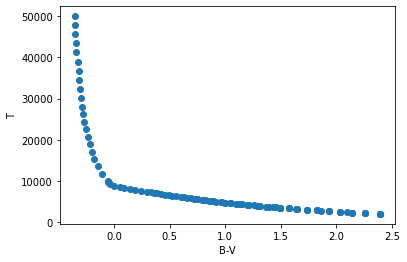

In [3]:
plt.scatter( star_data['B-V'],star_data['Teff_K'])
plt.xlabel('B-V')
plt.ylabel('T')

Text(0, 0.5, 'T')

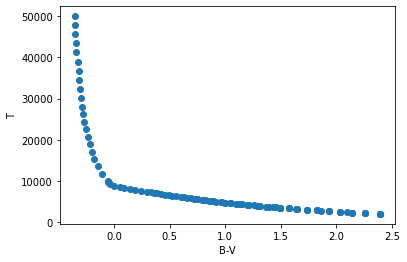

In [5]:
#You should get this:


### Problem 2

_pts 3_

Write a function that returns the $B-V$ color from a black body with temperature $T$.

1. Your function should take temperature, T, as an argument.
1. First it should compute a black body at temperature T.
1. Second, compute the B-Luminosity (Look at Numerical 5)
1. Third, compute the V-Luminosity (Look at Numerical 5)
1. Fourth, compute B-V
1. Return the result
1. Finally, check that your result gets approximately the right answer for the sun.


In [6]:
#Write your function here
def BmV(T):
    S = black_body(L,T)

    Lambda_b=445e-7
    fwhm_b=94e-7
    Lambda_v=551e-7
    fwhm_v=88e-7
    T_B = gaussian(Lambda_b,fwhm_b)
    L_B = (T_B*S*dL).sum()
    #plt.scatter(Lambda_b,L_B,c='b')
    T_V = gaussian(Lambda_v,fwhm_v)
    L_V = (T_V*S*dL).sum()
    return -2.5*np.log10(L_B/L_V)+CW

In [7]:
#Get B-V for the sun here.
BmV(Tsun)

0.526556059137899

### Problem 3

_3 pts_

1. Plot $B-V$ vs. $T$ for all the stars in `star_data` (this is the same as problem 1)
1. On the same plot, loop over `star_data['Teff_K']` and compute B-V for this temperature, using the function you wrote in the previous problem.  Plot B-V and T for the black body on the same plot.


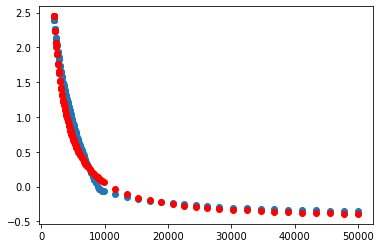

In [8]:
# work here.
plt.scatter(star_data['Teff_K'],star_data['B-V'])
for T in star_data['Teff_K']:
    plt.scatter( T, BmV(T),c='r')

Text(0, 0.5, 'B-V')

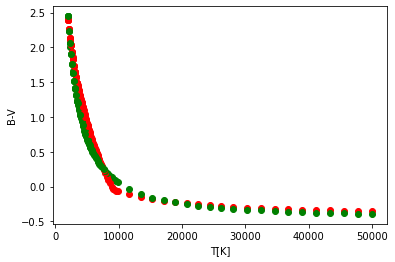

In [18]:
#You should get this

### Problem 5

_2 pts_

How long did this take you?

### Problem 7

_0 pts_

Students in the future will be subjected to these numerical exercises.  Is there anything you would change about this process?  Anything you found particularly irritating?